<h2>Methods definition</h2>

In [1]:
def Bisection(f, xl, xu, accuracy, i_num=None, data_export=False):
    """
    Bisection also known as Bolzano method, is a numerical analysis technique
    for finding the root of a function within an interval.

    Parameters:
    -----------
        f (function):
            The function for root finding. 
        xl (float): 
            The lower bound of the interval.
        xu (float):
            The upper bound of the interval.
        accuracy (int):
            The number of significant figures.
        i_num (int): 
            The maximum interation number. "None" is default
            wich calculate a theoretical interation number.
        data_export (bool): 
            If True, returns data in each iteration,
            if False, returns only the convergen.

    Returns:
    --------
        (generator): Returns a tuple which contains:
            - iteration number,
            - lower bound,
            - root approximation,
            - upper bound,
            - relative error,
            - tolerance
    """

    # Necessary library
    import math

    # Parameters
    eps = 0.5*10**-accuracy
    if i_num == None: i_num = math.ceil(math.log2((xu-xl)/eps))

    # Iteration
    for i in range(1,i_num+1):
        # New xr
        xr = (xu + xl)/2

        # Convergence criterion
        if f(xr) == 0:
            yield i,xl,xr,xu,0,eps
            break
        elif (xu-xl)/(abs(xu)+abs(xl)) < eps:
            yield i,xl,xr,xu,(xu-xl)/(abs(xu)+abs(xl)),eps
            break

        # Data export
        if data_export == True:
            yield i,xl,xr,xu,(xu-xl)/(abs(xu)+abs(xl)),eps

        # New edge 
        if f(xl)*f(xr) < 0: xu = xr
        else: xl = xr
    else:
        print('Not Convergent.')

In [66]:
def modRegulaFalsi(f, xl, xu, accuracy, i_num, rescaling=0.5, counter_limit=2, data_export=False):
    """
    Regula falsi also known as false position, is a numerical analysis
    method for finding the root of a function within an interval.
    This is a modified version known as Illinois algorithm.

    Parameters:
        f (function):
            The function for root finding. 
        xl (float):
            The lower bound of the interval.
        xu (float):
            The upper bound of the interval.
        accuracy (int):
            The number of significant figures.
        i_num (int):
            The maximum interation number.
        rescaling (float):
            This is a parameter that down-weighting one
            of the endpoint values to force the retained 
            endpoint y-value to change. rescaling ∈ (0,1].
        counter_limit (int): Couter limite before rescaling.
        data_export (bool): 
            If True, returns data in each iteration,
            if False, returns only the convergen.

    Returns:
        (generator): Returns a tuple which contains:
            - iteration number,
            - lower bound,
            - root approximation,
            - upper bound,
            - relative error,
            - tolerance
    """

    # Necessary library
    import math

    # Parameter
    eps = 0.5*10**-accuracy

    # Initial values
    fxl = f(xl)
    fxu = f(xu)
    cu = 0
    cl = 0

    # Iteration
    for i in range(1,i_num+1):
        # New xr
        xr = (xl*fxu - xu*fxl)/(fxu-fxl)
        fxr = f(xr)

        # Convergence criterion
        if f(xr) == 0:
            yield i,xl,xr,xu,0,eps
            break
        elif i>1 and xr!=0 and abs((xr - old_xr)/xr) < eps:
            yield i,xl,xr,xu,abs((xr - old_xr)/xr),eps
            break

        # Data export
        if data_export == True:
            if i>1 and xr==0 : yield i,xl,xr,xu,math.inf,eps
            elif i>1: yield i,xl,xr,xu,abs((xr - old_xr)/xr),eps
            else: yield i,xl,xr,xu,math.nan,eps

        # New edge    
        if f(xl)*f(xr) < 0: 
            xu = xr
            fxu = f(xu)
            cu = 0
            cl += 1
            if cl >= counter_limit: fxl *= rescaling
        else: 
            xl = xr
            fxl = f(xl)
            cl = 0
            cu += 1
            if cu >= counter_limit: fxu *= rescaling

        # Save xr
        old_xr = xr
    else:
        print('Not Convergent.')

In [96]:
def FixedPointIteration(g,x0, accuracy, i_num, data_export=False):
    '''
    Fixed-point iteration is a numerical analysis method for 
    finding the fixed point x0 of a function g, so that x = g(x), 
    where f(x) = x - g(x) and x0 is a root of f.
    
    Parameters:
        g (function):
            The function for fixed point finding. 
        xl (float):
            The lower bound of the interval.
        xu (float):
            The upper bound of the interval.
        accuracy (int):
            The number of significant figures.
        i_num (int):
            The maximum interation number.
        data_export (bool):
            If True, returns data in each iteration,
            if False, returns only the convergen.

    Returns:
        Returns:
        (generator): Returns a tuple which contains:
        iteration number,
        root approximation,
        relative error,
        tolerance
    '''
    
    # Necessary library
    import math

    # Parameter
    eps = 0.5*10**-accuracy

    # Iteration
    for i in range(1,i_num+1):
        # Save x0 and calculate new
        old_x0 = x0 
        
        # New x0
        x0 = g(x0)

        # Convergence criterion
        if x0==old_x0==0: break
        elif x0!=0 and abs((x0 - old_x0)/x0) < eps:
            yield i,x0,abs((x0 - old_x0)/x0),eps
            break

        # Data export
        if data_export == True:
            if x0==0: yield i,x0,math.inf,eps
            else: yield i,x0,abs((x0 - old_x0)/x0),eps
            
    else:
        print('Not Convergent.')

<h2>Initial conditions</h2>

In [2]:
# Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

pd.set_option('display.precision', 8)
sns.set_theme()

In [3]:
# The function f
def f(x): return math.e**x+x-2

# The function g
def g(x): return math.log(2-x)

true_root = 0.442854401

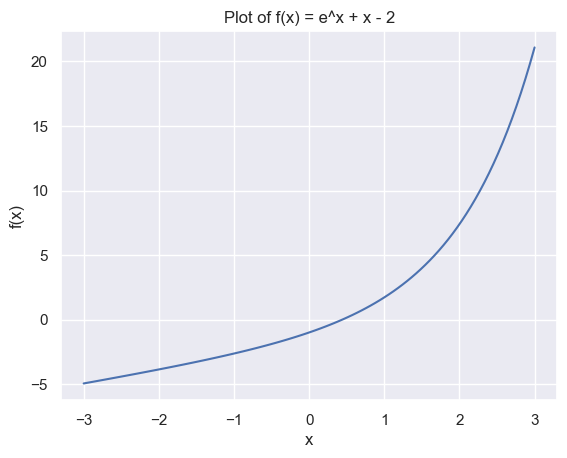

In [4]:
# Plot of the function
x = np.linspace(-3, 3, 100)
y = f(x)

sns.lineplot(x=x,y=y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = e^x + x - 2')
plt.show()

<h2>Bisection method</h2>

In [5]:
# Data
Bisection_data = list(Bisection(f, 0, 1, 6, i_num=30, data_export=True))
Bisection_df = pd.DataFrame(Bisection_data, columns=['Iteration', 'xl', 'xr', 'xu', 'e', 'eps']).set_index('Iteration')
Bisection_df['true_error'] = abs(true_root - Bisection_df.xr)/true_root
Bisection_df.iloc[[*range(5), *range(-5, 0)]]

,xl,xr,xu,e,eps,true_error
Iteration,,,,,,
1,0.00000000,0.50000000,1.00000000,1.00000000,0.0000005,1.29039248e-01
2,0.00000000,0.25000000,0.50000000,1.00000000,0.0000005,4.35480376e-01
3,0.25000000,0.37500000,0.50000000,0.33333333,0.0000005,1.53220564e-01
4,0.37500000,0.43750000,0.50000000,0.14285714,0.0000005,1.20906578e-02
5,0.43750000,0.46875000,0.50000000,0.06666667,0.0000005,5.84742953e-02
19,0.44285202,0.44285393,0.44285583,0.00000431,0.0000005,1.06894658e-06
20,0.44285393,0.44285488,0.44285583,0.00000215,0.0000005,1.08452489e-06
21,0.44285393,0.44285440,0.44285488,0.00000108,0.0000005,7.78915796e-09
22,0.44285393,0.44285417,0.44285440,0.00000054,0.0000005,5.30578709e-07


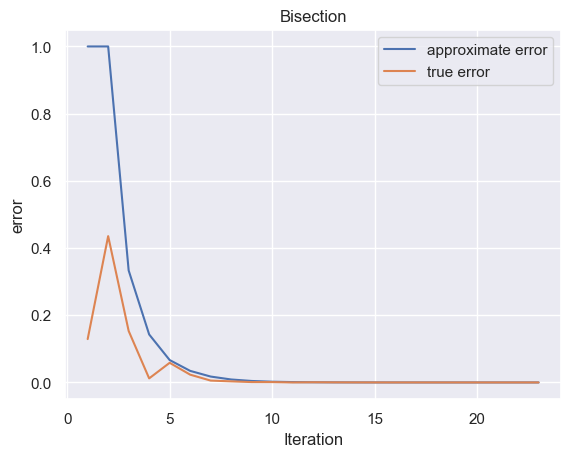

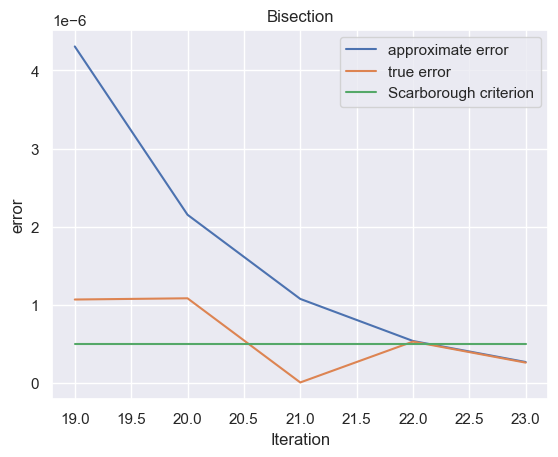

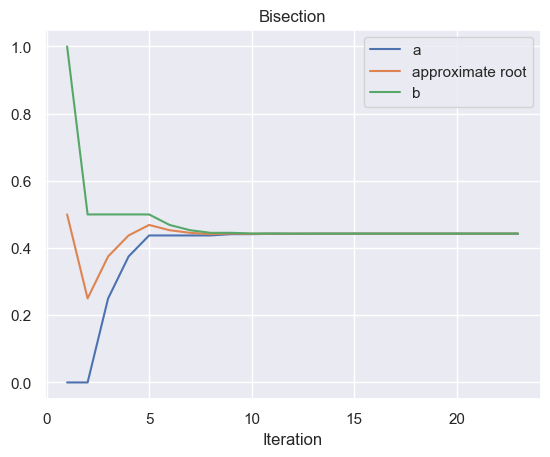

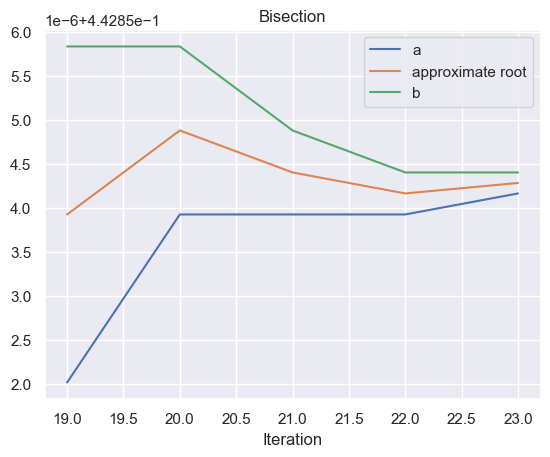

In [108]:
# Line plots of errors
sns.lineplot(x='Iteration', y='e', data=Bisection_df, label='approximate error')
sns.lineplot(x='Iteration', y='true_error', data=Bisection_df, label='true error')

# labels and title
plt.xlabel('Iteration')
plt.ylabel('error')
plt.title('Bisection')
plt.legend()
plt.show()


# Line plots of errors
sns.lineplot(x='Iteration', y='e', data=Bisection_df.iloc[-5:], label='approximate error')
sns.lineplot(x='Iteration', y='true_error', data=Bisection_df.iloc[-5:], label='true error')
sns.lineplot(x='Iteration', y='eps', data=Bisection_df.iloc[-5:], label='Scarborough criterion')

# labels and title
plt.xlabel('Iteration')
plt.ylabel('error')
plt.title('Bisection')
plt.legend()
plt.show()


# Line plots of the approximation root aand the interval
sns.lineplot(x='Iteration', y='xl', data=Bisection_df, label='a')
sns.lineplot(x='Iteration', y='xr', data=Bisection_df, label='approximate root')
sns.lineplot(x='Iteration', y='xu', data=Bisection_df, label='b')

# labels and title
plt.xlabel('Iteration')
plt.ylabel('')
plt.title('Bisection')
plt.legend()
plt.show()

# Line plots of the approximation root aand the interval
sns.lineplot(x='Iteration', y='xl', data=Bisection_df.iloc[-5:], label='a')
sns.lineplot(x='Iteration', y='xr', data=Bisection_df.iloc[-5:], label='approximate root')
sns.lineplot(x='Iteration', y='xu', data=Bisection_df.iloc[-5:], label='b')

# labels and title
plt.xlabel('Iteration')
plt.ylabel('')
plt.title('Bisection')
plt.legend()
plt.show()

<h2>Modified Regula Falsi method</h2>

In [105]:
# Data
modRegulaFalsi_data = list(modRegulaFalsi(f, 0, 1, 6, i_num=30, rescaling=0.5, data_export=True))
modRegulaFalsi_df = pd.DataFrame(modRegulaFalsi_data, columns=['Iteration', 'xl', 'xr', 'xu', 'e', 'eps']).set_index('Iteration')
modRegulaFalsi_df['true_error'] = abs(true_root - modRegulaFalsi_df.xr)/true_root
modRegulaFalsi_df

,xl,xr,xu,e,eps,true_error
Iteration,,,,,,
1,0.00000000,0.36787944,1.00000000,NaN,0.0000005,0.16929934
2,0.36787944,0.43005636,1.00000000,0.14457854,0.0000005,0.02889898
3,0.43005636,0.45089187,1.00000000,0.04620954,0.0000005,0.01814923
4,0.43005636,0.44282309,0.45089187,0.01822123,0.0000005,0.00007071
5,0.44282309,0.44285432,0.45089187,0.00007054,0.0000005,0.00000017
6,0.44285432,0.44285448,0.45089187,0.00000035,0.0000005,0.00000017


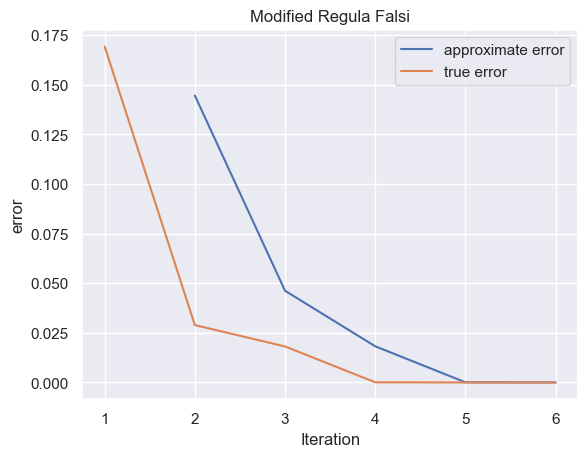

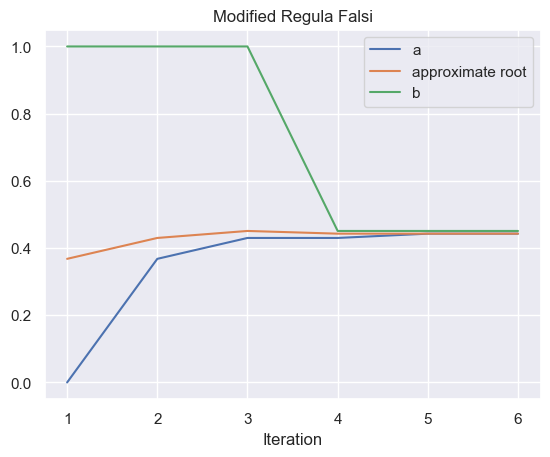

In [106]:
# Line plots of errors
sns.lineplot(x='Iteration', y='e', data=modRegulaFalsi_df, label='approximate error')
sns.lineplot(x='Iteration', y='true_error', data=modRegulaFalsi_df, label='true error')

# labels and title
plt.xlabel('Iteration')
plt.ylabel('error')
plt.title('Modified Regula Falsi')
plt.legend()
plt.show()


# Line plots of the approximation root and the interval
sns.lineplot(x='Iteration', y='xl', data=modRegulaFalsi_df, label='a')
sns.lineplot(x='Iteration', y='xr', data=modRegulaFalsi_df, label='approximate root')
sns.lineplot(x='Iteration', y='xu', data=modRegulaFalsi_df, label='b')

# labels and title
plt.xlabel('Iteration')
plt.ylabel('')
plt.title('Modified Regula Falsi')
plt.legend()
plt.show()

<h2>Fixed-point iteration method</h2>

In [109]:
# Data
FixedPointIteration_data = list(FixedPointIteration(g, 0.5, 6, i_num=50, data_export=True))
FixedPointIteration_df = pd.DataFrame(FixedPointIteration_data, columns=['Iteration', 'xr', 'e', 'eps']).set_index('Iteration')
FixedPointIteration_df['true_error'] = abs(true_root - FixedPointIteration_df.xr)/true_root
FixedPointIteration_df.iloc[[*range(5), *range(-5, 0)]]

,xr,e,eps,true_error
Iteration,,,,
1,0.40546511,0.23315173,0.0000005,0.08442796
2,0.46658209,0.13098870,0.0000005,0.05357898
3,0.42749917,0.09142221,0.0000005,0.03467331
4,0.45266724,0.05559948,0.0000005,0.02215815
5,0.43653265,0.03696077,0.0000005,0.01427501
27,0.44285403,0.00000214,0.0000005,0.00000084
28,0.44285464,0.00000137,0.0000005,0.00000054
29,0.44285425,0.00000088,0.0000005,0.00000035
30,0.44285450,0.00000057,0.0000005,0.00000022


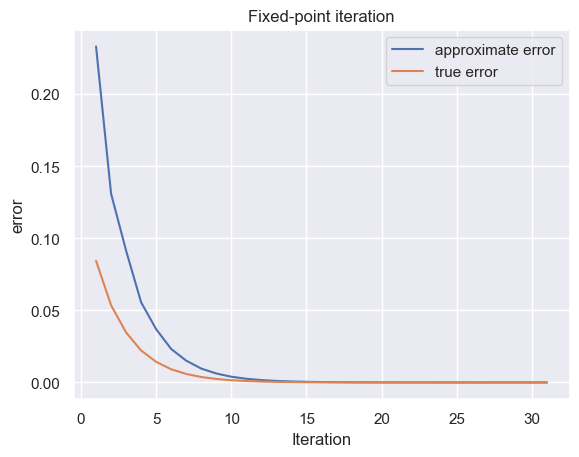

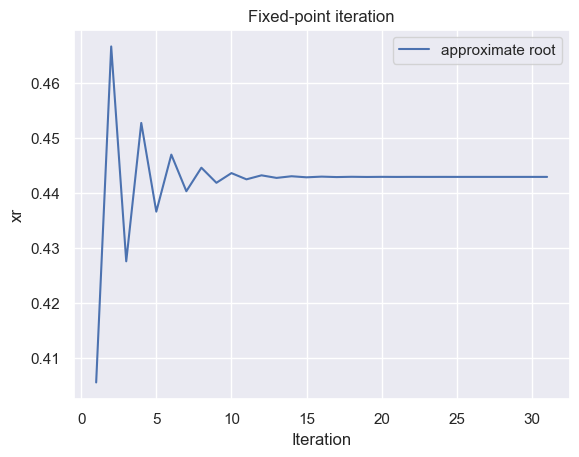

In [110]:
# Line plots of errors
sns.lineplot(x='Iteration', y='e', data=FixedPointIteration_df, label='approximate error')
sns.lineplot(x='Iteration', y='true_error', data=FixedPointIteration_df, label='true error')

# labels and title
plt.xlabel('Iteration')
plt.ylabel('error')
plt.title('Fixed-point iteration')
plt.legend()
plt.show()


# Line plot of the approximation root
sns.lineplot(x='Iteration', y='xr', data=FixedPointIteration_df, label='approximate root')

# labels and title
plt.xlabel('Iteration')
plt.ylabel('xr')
plt.title('Fixed-point iteration')
plt.legend()
plt.show()